In [2]:
import shutil
shutil.copytree(r'../input/flower/flower_dataset',r'./data')


'./data'

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 208MB/s] 


Epoch 0/24
----------
Learning Rate: 0.001000
train Loss: 0.9140 Acc: 0.6572
val Loss: 0.3900 Acc: 0.8632

Epoch 1/24
----------
Learning Rate: 0.001000
train Loss: 0.3913 Acc: 0.8652
val Loss: 0.3010 Acc: 0.8947

Epoch 2/24
----------
Learning Rate: 0.001000
train Loss: 0.3395 Acc: 0.8758
val Loss: 0.2508 Acc: 0.9140

Epoch 3/24
----------
Learning Rate: 0.001000
train Loss: 0.3164 Acc: 0.8850
val Loss: 0.2624 Acc: 0.9053

Epoch 4/24
----------
Learning Rate: 0.001000
train Loss: 0.2710 Acc: 0.8999
val Loss: 0.2320 Acc: 0.9175

Epoch 5/24
----------
Learning Rate: 0.001000
train Loss: 0.2325 Acc: 0.9162
val Loss: 0.2472 Acc: 0.9193

Epoch 6/24
----------
Learning Rate: 0.001000
train Loss: 0.2142 Acc: 0.9263
val Loss: 0.2144 Acc: 0.9281

Epoch 7/24
----------
Learning Rate: 0.000100
train Loss: 0.1991 Acc: 0.9293
val Loss: 0.2419 Acc: 0.9228

Epoch 8/24
----------
Learning Rate: 0.000100
train Loss: 0.2067 Acc: 0.9298
val Loss: 0.2092 Acc: 0.9158

Epoch 9/24
----------
Learning Rate: 

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:01<00:00, 216MB/s] 


Epoch 0/24
----------
Learning Rate: 0.001000
train Loss: 0.9144 Acc: 0.6800
val Loss: 0.3588 Acc: 0.8930

Epoch 1/24
----------
Learning Rate: 0.001000
train Loss: 0.3923 Acc: 0.8626
val Loss: 0.3043 Acc: 0.8912

Epoch 2/24
----------
Learning Rate: 0.001000
train Loss: 0.3309 Acc: 0.8845
val Loss: 0.2698 Acc: 0.9070

Epoch 3/24
----------
Learning Rate: 0.001000
train Loss: 0.2858 Acc: 0.9052
val Loss: 0.2386 Acc: 0.9123

Epoch 4/24
----------
Learning Rate: 0.001000
train Loss: 0.2618 Acc: 0.9122
val Loss: 0.2436 Acc: 0.9228

Epoch 5/24
----------
Learning Rate: 0.001000
train Loss: 0.2358 Acc: 0.9162
val Loss: 0.2304 Acc: 0.9158

Epoch 6/24
----------
Learning Rate: 0.001000
train Loss: 0.2117 Acc: 0.9232
val Loss: 0.2425 Acc: 0.9211

Epoch 7/24
----------
Learning Rate: 0.000100
train Loss: 0.1963 Acc: 0.9271
val Loss: 0.1824 Acc: 0.9421

Epoch 8/24
----------
Learning Rate: 0.000100
train Loss: 0.1853 Acc: 0.9315
val Loss: 0.2069 Acc: 0.9228

Epoch 9/24
----------
Learning Rate: 

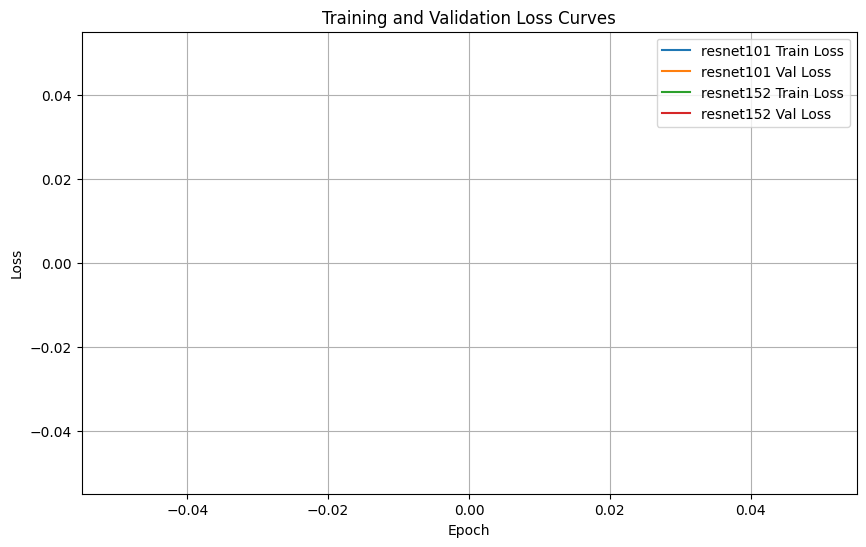

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, transforms, models
from torch.utils.data import random_split
import os
import time
import copy
import matplotlib.pyplot as plt

# Set data directory
data_dir = '/kaggle/working/data'

# Data augmentation and normalization for training and validation
data_transforms = transforms.Compose([
        # GRADED FUNCTION: Add five data augmentation methods, Normalizating and Tranform to tensor
        ### START SOLUTION HERE ###
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ### END SOLUTION HERE ###
])

# Load the entire dataset
full_dataset = datasets.ImageFolder(data_dir, data_transforms)

# Automatically split into 80% train and 20% validation
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Use DataLoader for both train and validation datasets
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

dataloaders = {'train': train_loader, 'val': val_loader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Get class names from the dataset
class_names = full_dataset.classes

# Load pre-trained model and modify the last layer
model = models.resnet18(pretrained=True)


# GRADED FUNCTION: Modify the last fully connected layer of model
### START SOLUTION HERE ###
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))
### END SOLUTION HERE ###



# GRADED FUNCTION: Define the loss function
### START SOLUTION HERE ###
criterion = nn.CrossEntropyLoss()
### END SOLUTION HERE ###

# GRADED FUNCTION: Define the optimizer
### START SOLUTION HERE ###
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
### END SOLUTION HERE ###

# Learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training function
def train_model(model, criterion, optimizer, scheduler, num_epochs=25, model_name='resnet'):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Print learning rate for current epoch
        current_lr = optimizer.param_groups[0]['lr']
        print(f'Learning Rate: {current_lr:.6f}')

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        
                        # GRADED FUNCTION: Backward pass and optimization
                        ### START SOLUTION HERE ###
                        loss.backward()
                        optimizer.step()
                        ### END SOLUTION HERE ###

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()  # Update learning rate based on scheduler

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Save the model if validation accuracy is the best so far
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                # Save the best model
                save_dir = 'Ex2/work_dir'
                os.makedirs(save_dir, exist_ok=True)

               # GRADED FUNCTION: Save the best model
                ### START SOLUTION HERE ###
                torch.save(model.state_dict(), os.path.join(save_dir, 'best_model.pth'))
                ### END SOLUTION HERE ###

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    model.load_state_dict(best_model_wts)
    # 返回loss曲线
    return model, train_losses, val_losses

def plot_loss_curves(loss_dict):
    plt.figure(figsize=(10,6))
    for model_name, (train_losses, val_losses) in loss_dict.items():
        plt.plot(train_losses, label=f'{model_name} Train Loss')
        plt.plot(val_losses, label=f'{model_name} Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.grid()
    plt.show()

# Train the model
if __name__ == '__main__':
    loss_dict = {}

    for model_name, model_fn in [
        ('resnet101', models.resnet101),
        ('resnet152', models.resnet152)
    ]:
        model = model_fn(pretrained=True)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, len(class_names))
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
        scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
        model, train_losses, val_losses = train_model(model, criterion, optimizer, scheduler, num_epochs=25, model_name=model_name)
        loss_dict[model_name] = (train_losses, val_losses)

    plot_loss_curves(loss_dict)
